In [ ]:
#import os
#os._exit(00)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [66]:
# Generate a synthetic dataset
np.random.seed(42)
num_samples = 1000
X1 = np.random.randint(100, 200, num_samples) # size(m2)
X2 = np.random.randint(1, 4, num_samples)     # Bedrooms
X3 = np.random.randint(1, 4, num_samples)     # Bathrooms
X4 = np.random.randint(1, 20, num_samples)    # Age(year)
noise = np.random.randn(num_samples)*50       # Noise term, higher more realistic

y = 100 + 3 * X1 + 1.5 * X2 + 1.2 * X3 + 1 * X4 + noise   # Price(KUSD)

# Create a DataFrame
data = pd.DataFrame({'Size(m2)': X1, 'Bedrooms': X2, 'Bathrooms': X3, 'Age(year)': X4, 'Price(KUSD)': y})
data.head()


,Size(m2),Bedrooms,Bathrooms,Age(year),Price(KUSD)
0,151,2,1,10,590.372154
1,192,3,2,3,713.226132
2,114,1,2,14,504.628884
3,171,3,2,19,533.066812
4,160,2,2,5,565.902492


In [67]:
# Prepare the feature matrix and target variable
X = data[['Size(m2)', 'Bedrooms', 'Bathrooms', 'Age(year)']]
y = data['Price(KUSD)']

# Add a column of ones to X for the bias term
#X['bias'] = 1

# Convert X and y to NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

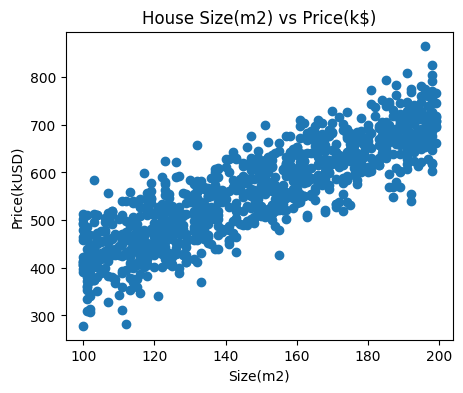

In [68]:
plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], y.reshape(-1, 1))
plt.title('House Size(m2) vs Price(k$)')
plt.xlabel('Size(m2)')
plt.ylabel('Price(kUSD)')
plt.show()

In [111]:
import math

class LinearRegression:

    def __init__(self, alpha=1e-2, epochs=1000):
        self.alpha = alpha
        self.epochs = epochs
        self.w = None
        self.b = None

    def compute_cost(self, X, y, w, b):
        y_pred = np.dot(X, w) + b
        J_wb = np.mean((y_pred - y) ** 2)
        return J_wb

    def compute_gradient(self, X, y, w, b):
        y_pred = np.dot(X, w) + b
        Dw = np.dot(X.T, (y_pred - y)) / len(y)
        Db = np.mean(y_pred - y)
        return Dw, Db

    def gradient_descent(self, X, y):
        num_samples, num_features = X.shape
        self.w = np.zeros(num_features)
        self.b = 0
        j_history = []
        p_history = []

        for i in range(self.epochs):
            Dw, Db = self.compute_gradient(X, y, self.w, self.b)
            self.w = self.w - self.alpha * Dw
            self.b = self.b - self.alpha * Db

            # Save cost J at each iteration
            j_history.append(self.compute_cost(X, y, self.w, self.b))
            p_history.append([self.w, self.b])

            # Print cost every at intervals 10 times or as many iterations if < 10
            if i % math.ceil(self.epochs / 10) == 0:
                print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                      f"Dw: {np.linalg.norm(Dw): 0.3e}, Db: {Db: 0.3e}  ",
                      f"w: {self.w}, b:{self.b: 0.5e}")

        return self.w, self.b, j_history, p_history

    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        return y_pred


In [107]:
from matplotlib.ticker import MaxNLocator

class GradientDescentVisualizer:
    def __init__(self):
        pass

    def compute_cost(self, x, y, w, b):
        f_wb = np.dot(x, w) + b
        J_wb = np.mean((f_wb - y) ** 2)
        return J_wb

    def inbounds(self, a, b, xlim, ylim):
        xlow, xhigh = xlim
        ylow, yhigh = ylim
        ax, ay = a
        bx, by = b
        return (xlow < ax < xhigh) and (xlow < bx < xhigh) and (ylow < ay < yhigh) and (ylow < by < yhigh)

    def plt_contour(self,
                    x,
                    y,
                    hist,
                    ax,
                    w_range=[0, 100, 5], b_range=[0, 500, 5],
                    contours=[0.1, 50, 1000, 5000, 10000, 25000, 50000, 75000],
                    resolution=0.5, w_final=200, b_final=100, step=10):

        b0, w0 = np.meshgrid(np.arange(*b_range), np.arange(*w_range))
        z = np.zeros_like(b0)

        for i in range(w0.shape[0]):
            for j in range(w0.shape[1]):
                z[i][j] = self.compute_cost(x, y, w0[i][j], b0[i][j])

        CS = ax.contour(w0, b0, z, contours, linewidths=2, colors=['blue', 'orange', 'darkred', 'magenta', 'purple'])

        ax.clabel(CS, inline=1, fmt='%1.0f', fontsize=10)
        ax.set_xlabel("w")
        ax.set_ylabel("b")
        ax.set_title('Contour plot of cost J(w,b), vs b,w with path of gradient descent')

        # Plot the gradient path
        for i in range(0, len(hist), step):
            point = hist[i]
            w, b = point[:2]  # Extract w and b from the point
            ax.plot(w, b, marker='*', markersize=1, color='green')

        # Highlight the final point
        final_point = hist[-1]
        w_final, b_final = final_point[:2]
        ax.plot(w_final, b_final, marker='o', markersize=8, color='red', label='Final Point')
        ax.legend()

    def plt_divergence(self, p_hist, J_hist, x_train, y_train):
        x = np.zeros(len(p_hist))
        y = np.zeros(len(p_hist))
        v = np.zeros(len(p_hist))
        for i in range(len(p_hist)):
            x[i] = p_hist[i][0]
            y[i] = p_hist[i][1]
            v[i] = J_hist[i]

        fig = plt.figure(figsize=(12, 5))
        plt.subplots_adjust(wspace=0)
        gs = fig.add_gridspec(1, 5)
        fig.suptitle(f"Cost escalates when learning rate is too large")

        ax = fig.add_subplot(gs[:2])

        fix_b = 100
        w_array = np.arange(-70000, 70000, 1000)
        cost = np.zeros_like(w_array)

        for i in range(len(w_array)):
            tmp_w = w_array[i]
            cost[i] = self.compute_cost(x_train, y_train, tmp_w, fix_b)

        ax.plot(w_array, cost)
        ax.plot(x, v, c='magenta')
        ax.set_title("Cost vs w, b set to 100")
        ax.set_ylabel('Cost')
        ax.set_xlabel('w')
        ax.xaxis.set_major_locator(MaxNLocator(2))

        tmp_b, tmp_w = np.meshgrid(np.arange(-35000, 35000, 500), np.arange(-70000, 70000, 500))
        z = np.zeros_like(tmp_b)
        for i in range(tmp_w.shape[0]):
            for j in range(tmp_w.shape[1]):
                z[i][j] = self.compute_cost(x_train, y_train, tmp_w[i][j], tmp_b[i][j])

        ax = fig.add_subplot(gs[2:], projection='3d')
        ax.plot_surface(tmp_w, tmp_b, z, alpha=0.3, color='blue')
        ax.xaxis.set_major_locator(MaxNLocator(2))
        ax.yaxis.set_major_locator(MaxNLocator(2))

        ax.set_xlabel('w', fontsize=16)
        ax.set_ylabel('b', fontsize=16)
        ax.set_zlabel('\ncost', fontsize=16)
        plt.title('Cost vs (b, w)')

        ax.view_init(elev=20., azim=-65)
        ax.plot(x, y, v, c='magenta')


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1234)


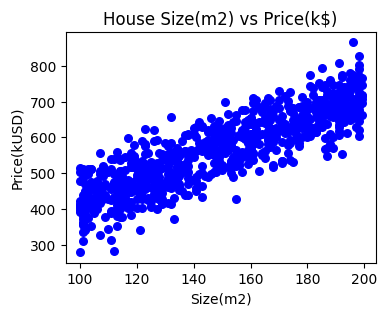

In [72]:
fig = plt.figure(figsize=(4,3))
plt.scatter(X_train[:,0], y_train, color = 'b', marker='o', s=30)
plt.title('House Size(m2) vs Price(k$)')
plt.xlabel('Size(m2)')
plt.ylabel('Price(kUSD)')
plt.show()

In [132]:
reg = LinearRegression(alpha = 1e-5, epochs = 1000)
reg.gradient_descent(X_train, y_train)
y_pred = reg.predict(X_test)

def rms(y_test, y_pred):
  return np.sqrt(np.mean((y_test - y_pred)**2))
rms = round(rms(y_test, y_pred),2)
print(rms)

Iteration    0: Cost 1.96e+05  Dw:  8.788e+04, Db: -5.670e+02   w: [0.87680529 0.01138508 0.01114727 0.05651715], b: 5.67050e-03
Iteration  100: Cost 3.07e+03  Dw:  5.812e+01, Db: -4.091e+00   w: [3.73278418 0.05590741 0.0555636  0.29676025], b: 2.81322e-02
Iteration  200: Cost 3.07e+03  Dw:  5.628e+01, Db: -4.071e+00   w: [3.72898732 0.06351246 0.06384899 0.35269915], b: 3.22133e-02
Iteration  300: Cost 3.06e+03  Dw:  5.451e+01, Db: -4.052e+00   w: [3.72530802 0.07108472 0.07208991 0.40681232], b: 3.62748e-02
Iteration  400: Cost 3.05e+03  Dw:  5.279e+01, Db: -4.034e+00   w: [3.72174247 0.07862504 0.08028758 0.45915907], b: 4.03175e-02
Iteration  500: Cost 3.05e+03  Dw:  5.114e+01, Db: -4.016e+00   w: [3.71828698 0.08613426 0.08844319 0.50979676], b: 4.43419e-02
Iteration  600: Cost 3.04e+03  Dw:  4.954e+01, Db: -3.998e+00   w: [3.71493799 0.09361319 0.09655791 0.55878089], b: 4.83486e-02
Iteration  700: Cost 3.04e+03  Dw:  4.799e+01, Db: -3.981e+00   w: [3.71169203 0.1010626  0.10463

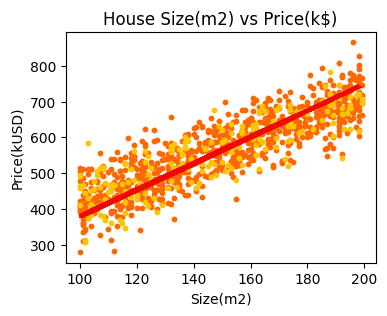

In [133]:
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize = (4,3))
ml = plt.scatter(X_train[:,0], y_train, color=cmap(0.8), s=10)
m2 = plt.scatter(X_test[:,0], y_test, color=cmap(0.7), s=10)
plt.plot(X_test[:,0],
         y_pred,
         color=cmap(0.9),
         linewidth=1,
         label='Predictions')
plt.title('House Size(m2) vs Price(k$)')
plt.xlabel('Size(m2)')
plt.ylabel('Price(kUSD)')
plt.show()

In [134]:
# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-5

# Create an instance of the LinearRegression class
reg = LinearRegression(alpha=tmp_alpha, epochs=iterations)

# Run gradient descent
w_final, b_final, j_hist, p_hist = reg.gradient_descent(X_train, y_train)

print(f"(w, b) found by gradient descent: ({w_final}, {b_final})")


Iteration    0: Cost 1.96e+05  Dw:  8.788e+04, Db: -5.670e+02   w: [0.87680529 0.01138508 0.01114727 0.05651715], b: 5.67050e-03
Iteration 1000: Cost 3.03e+03  Dw:  4.365e+01, Db: -3.933e+00   w: [3.70253952 0.12324119 0.12862951 0.73923011], b: 6.42088e-02
Iteration 2000: Cost 3.00e+03  Dw:  3.207e+01, Db: -3.803e+00   w: [3.67748903 0.19553199 0.20643332 1.09806867], b: 1.02857e-01
Iteration 3000: Cost 2.98e+03  Dw:  2.397e+01, Db: -3.706e+00   w: [3.65899328 0.26572072 0.28147215 1.3552288 ], b: 1.40378e-01
Iteration 4000: Cost 2.97e+03  Dw:  1.842e+01, Db: -3.634e+00   w: [3.64521358 0.33422567 0.35434306 1.53930509], b: 1.77064e-01
Iteration 5000: Cost 2.97e+03  Dw:  1.473e+01, Db: -3.580e+00   w: [3.63482818 0.40134913 0.42547691 1.67085241], b: 2.13121e-01
Iteration 6000: Cost 2.96e+03  Dw:  1.237e+01, Db: -3.538e+00   w: [3.62688691 0.46730998 0.49518506 1.7646464 ], b: 2.48702e-01
Iteration 7000: Cost 2.96e+03  Dw:  1.092e+01, Db: -3.506e+00   w: [3.62070671 0.53226713 0.56369

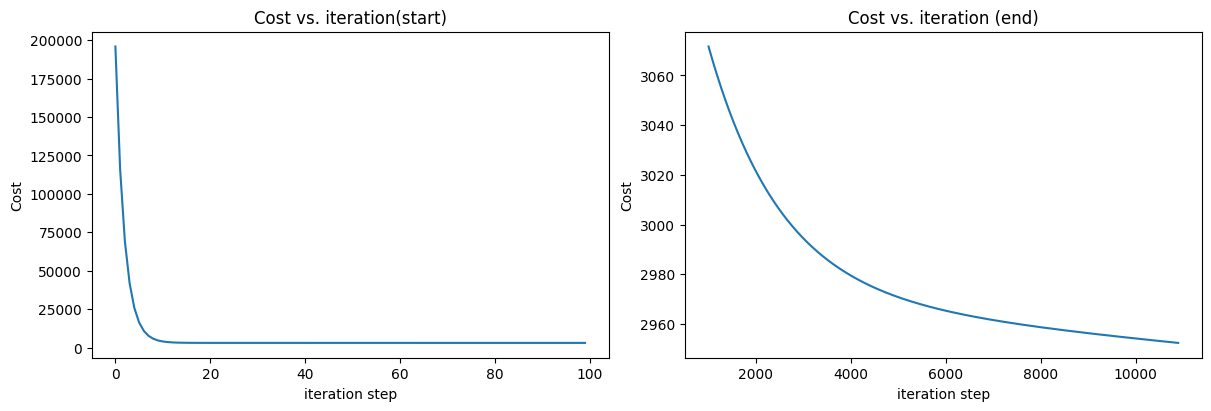

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

# Plot for the first 100 steps
ax1.plot(j_hist[:100])

# Plot after 1000 steps
ax2.plot(1000 + np.arange(len(j_hist[100:])), j_hist[100:])

ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')

# Display the plot
plt.show()

In [136]:
x = [150, 2, 1, 10]
print(f"150 sqm house prediction: {np.sum(np.dot(w_final, x) + b_final)}k$")


150 sqm house prediction: 563.2139581552053k$


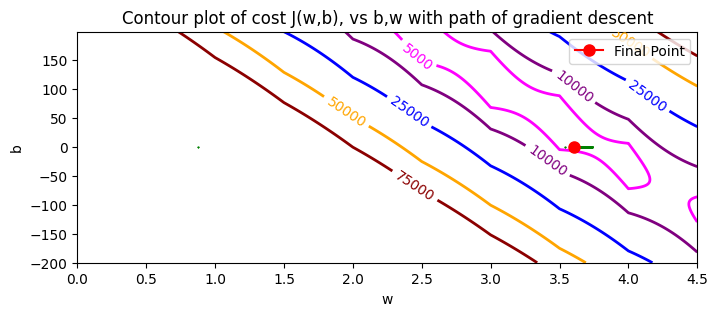

In [137]:
# Example usage
vis = GradientDescentVisualizer()
fig, ax = plt.subplots(figsize=(8, 3))

# Use plt_contour to create a contour plot with gradient path
vis.plt_contour(
    [x[0] for x in X_train],# Feature values on the x-axis
    y_train,                # Target values
    [p[0] for p in p_hist], # Extract 'w' values from the history for the gradient path
    ax,
    w_range=[0, 5, 0.5],    # Range for weights (w) on the x-axis
    b_range=[-200, 200, 0.5],  # Range for bias (b) on the y-axis
    contours=[0.1, 50, 1000, 5000, 10000, 25000, 50000, 75000],  # Contour levels to be displayed
    resolution=0.5          # Resolution of the contour plot
)

plt.show()



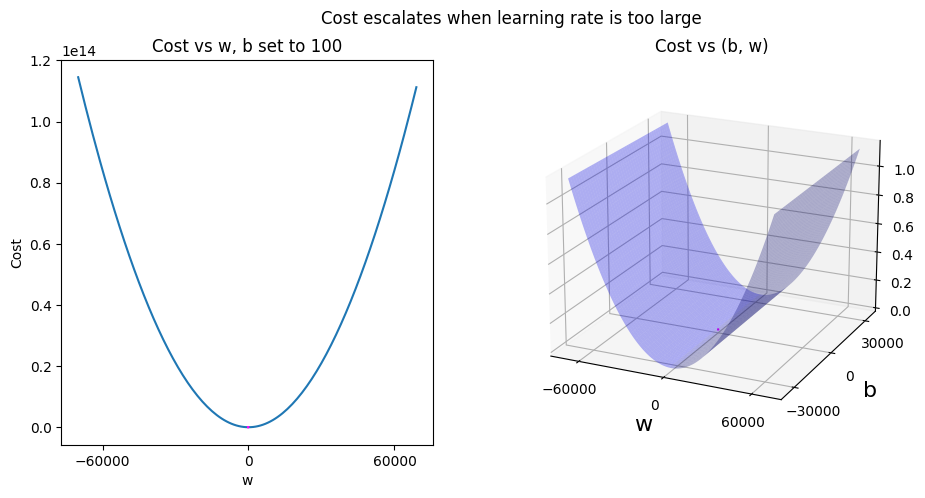

In [127]:
vis.plt_divergence([p[0] for p in p_hist],
                   j_hist,
                   [x[0] for x in X_train],
                   y_train)